In [1]:
import pandas as pd

Load and inspect the dataset.
Handle missing values and data cleaning if necessary.

In [2]:
df = pd.read_csv('Nutrical Dataset.csv')

print(df.head())  
print(df.info())  

df = df.dropna()
df = df.drop_duplicates()

df.reset_index(drop=True, inplace=True)

print(df.head())

    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

Analyze the distribution of calorie counts across menu items.

In [3]:
import matplotlib.pyplot as plt

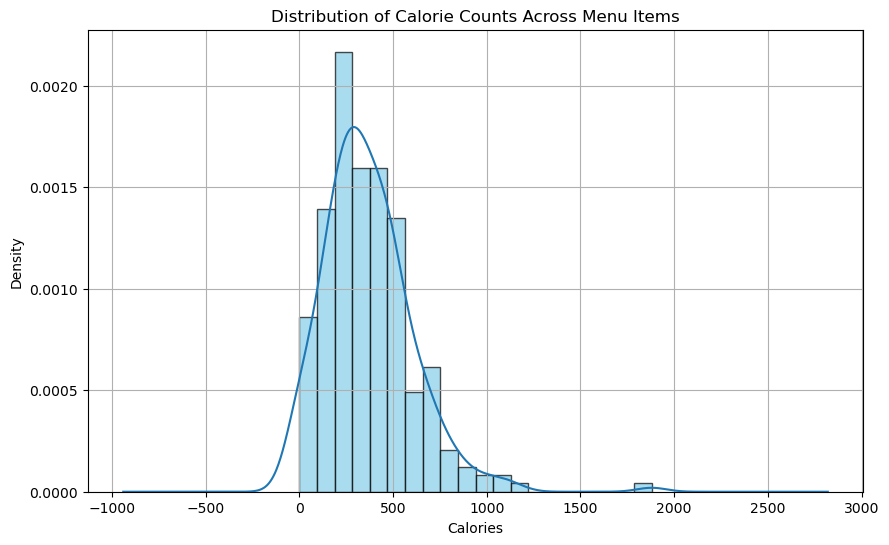

In [4]:
plt.figure(figsize=(10, 6))

df['Calories'].plot(kind='hist', bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)
df['Calories'].plot(kind='kde')

plt.xlabel('Calories')
plt.ylabel('Density')
plt.title('Distribution of Calorie Counts Across Menu Items')
plt.grid(True)
plt.show()

Explore the nutritional content (e.g., fat, protein, carbohydrates) of different items.

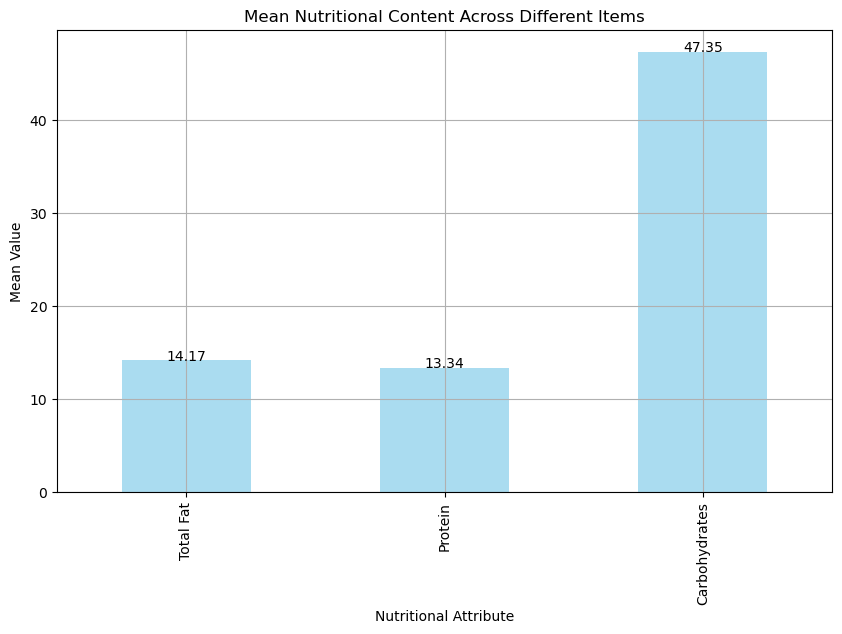

In [5]:
nutritional_columns = ['Total Fat', 'Protein', 'Carbohydrates']
nutritional_summary = df[nutritional_columns].describe()

plt.figure(figsize=(10, 6))
bars = nutritional_summary.loc['mean'].plot(kind='bar', color='skyblue', alpha=0.7)

#adding values
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             round(bar.get_height(), 2), ha='center')

plt.xlabel('Nutritional Attribute')
plt.ylabel('Mean Value')
plt.title('Mean Nutritional Content Across Different Items')
plt.grid(True)
plt.show()

Identify trends and patterns in the dataset.

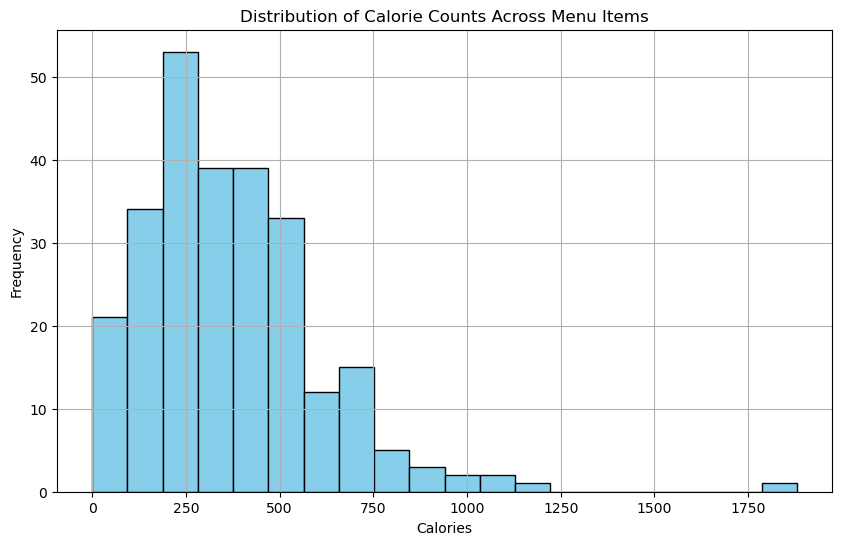

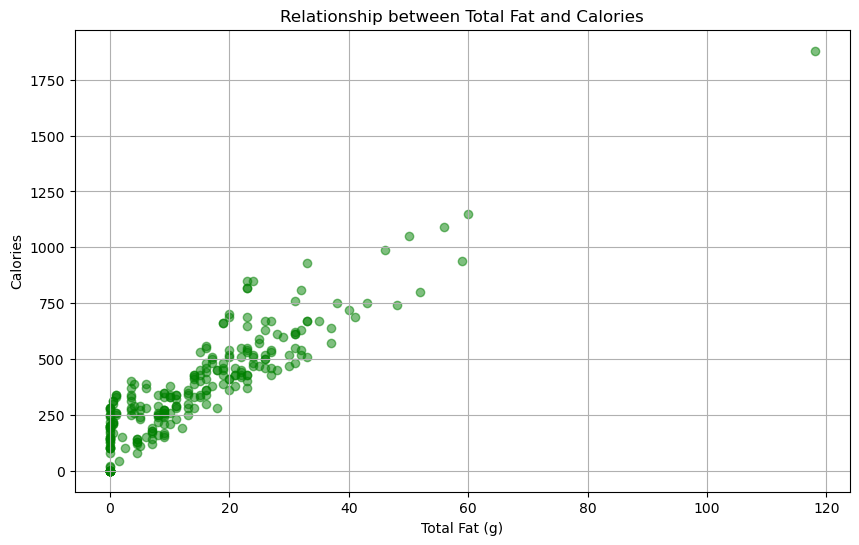

In [6]:
#Distribution of Calorie Counts Across Menu Items
plt.figure(figsize=(10, 6))
plt.hist(df['Calories'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calorie Counts Across Menu Items')
plt.grid(True)
plt.show()

#Relationship between Total Fat and Calories
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Fat'], df['Calories'], color='green', alpha=0.5)
plt.xlabel('Total Fat (g)')
plt.ylabel('Calories')
plt.title('Relationship between Total Fat and Calories')
plt.grid(True)
plt.show()

Create bar charts, histograms, and box plots to visualize calorie distribution and nutritional content.

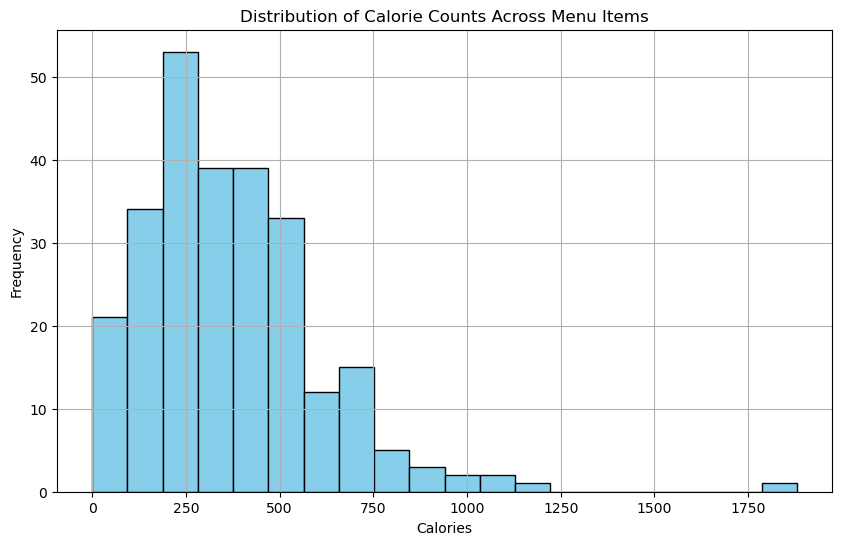

<Figure size 1000x600 with 0 Axes>

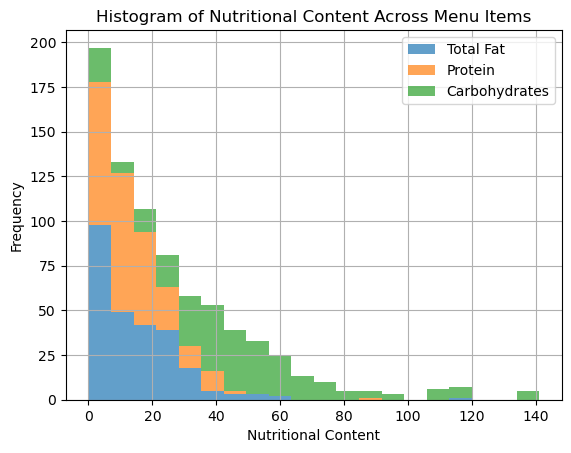

<Figure size 1000x600 with 0 Axes>

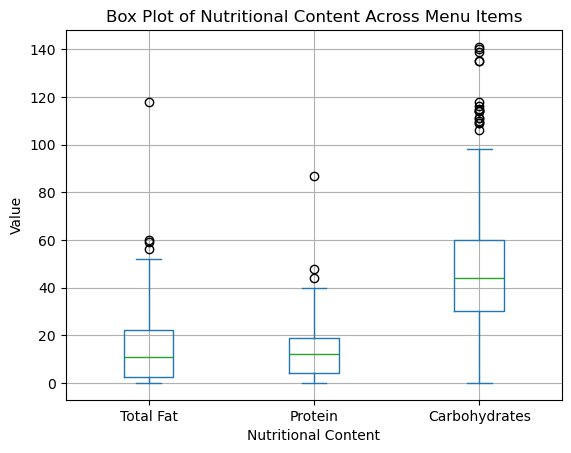

In [7]:
plt.figure(figsize=(10, 6))
df['Calories'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calorie Counts Across Menu Items')
plt.grid(True)
plt.show()

# Create histogram for nutritional content
nutritional_columns = ['Total Fat', 'Protein', 'Carbohydrates']
plt.figure(figsize=(10, 6))
df[nutritional_columns].plot(kind='hist', bins=20, alpha=0.7, stacked=True)
plt.xlabel('Nutritional Content')
plt.ylabel('Frequency')
plt.title('Histogram of Nutritional Content Across Menu Items')
plt.grid(True)
plt.show()

# Create box plot for nutritional content
plt.figure(figsize=(10, 6))
df[nutritional_columns].plot(kind='box')
plt.xlabel('Nutritional Content')
plt.ylabel('Value')
plt.title('Box Plot of Nutritional Content Across Menu Items')
plt.grid(True)
plt.show()

Compare nutritional characteristics of different food categories (e.g., burgers, salads, desserts).

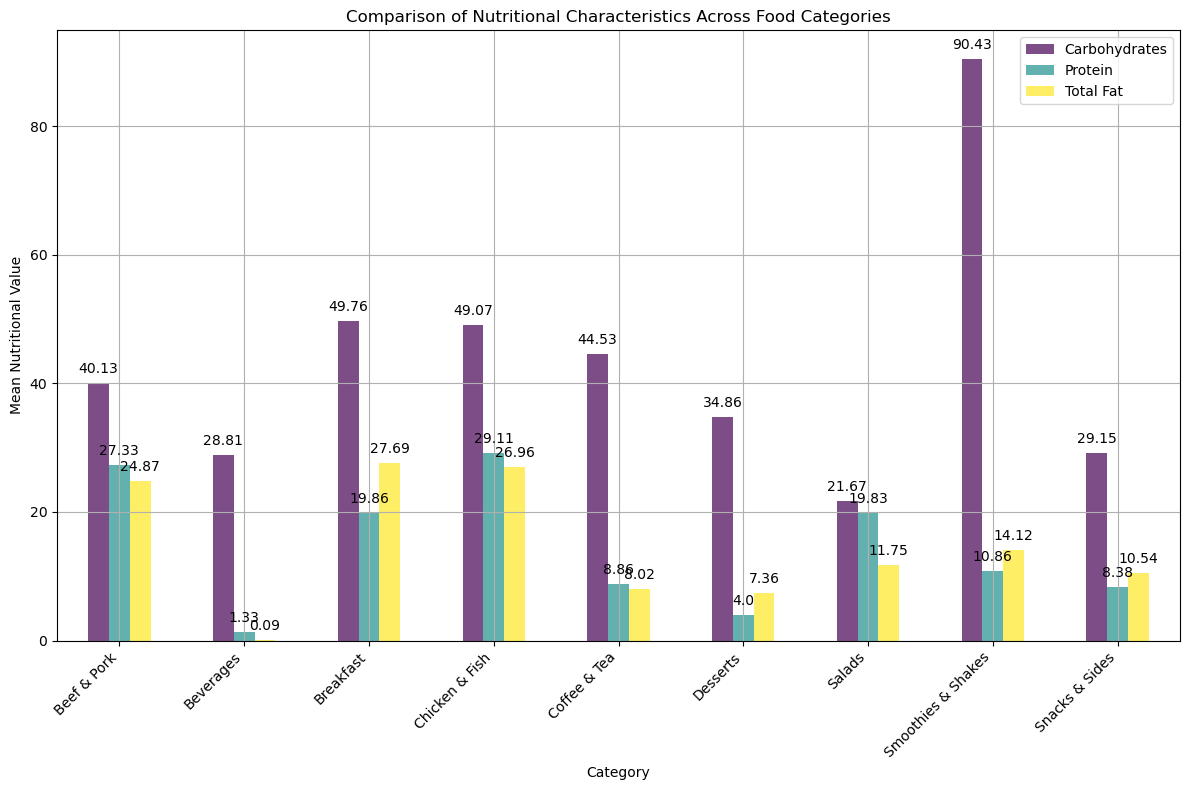

In [8]:
pivot_table = df.pivot_table(values=['Total Fat', 'Protein', 'Carbohydrates'], index='Category', aggfunc='mean')

ax = pivot_table.plot(kind='bar', figsize=(12, 8), colormap='viridis', alpha=0.7)

# Adding values
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Category')
plt.ylabel('Mean Nutritional Value')
plt.title('Comparison of Nutritional Characteristics Across Food Categories')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Identify menu items with the highest and lowest calorie counts.

In [9]:
print("-----------------------------------------")
highest_calories = df.loc[df['Calories'].idxmax()]
print("Menu item with the highest calorie count:")
print(highest_calories[['Category', 'Item', 'Calories']])

# Identify menu items with the lowest calorie counts
print("-----------------------------------------")
lowest_calories = df.loc[df['Calories'].idxmin()]
print("Menu item with the lowest calorie count:")
print(lowest_calories[['Category', 'Item', 'Calories']])
print("-----------------------------------------")

-----------------------------------------
Menu item with the highest calorie count:
Category                  Chicken & Fish
Item        Chicken McNuggets (40 piece)
Calories                            1880
Name: 82, dtype: object
-----------------------------------------
Menu item with the lowest calorie count:
Category            Beverages
Item        Diet Coke (Small)
Calories                    0
Name: 114, dtype: object
-----------------------------------------


Determine the average nutritional content of popular menu categories.

In [10]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

average_nutrition = df.groupby('Category')[numeric_columns].mean()

print("Average Nutritional Content of Popular Menu Categories:")
print(average_nutrition)

Average Nutritional Content of Popular Menu Categories:
                      Calories  Calories from Fat  Total Fat  \
Category                                                       
Beef & Pork         494.000000         224.666667  24.866667   
Beverages           113.703704           0.740741   0.092593   
Breakfast           526.666667         248.928571  27.690476   
Chicken & Fish      552.962963         242.222222  26.962963   
Coffee & Tea        283.894737          71.105263   8.021053   
Desserts            222.142857          64.285714   7.357143   
Salads              270.000000         108.333333  11.750000   
Smoothies & Shakes  531.428571         127.678571  14.125000   
Snacks & Sides      245.769231          94.615385  10.538462   

                    Total Fat (% Daily Value)  Saturated Fat  \
Category                                                       
Beef & Pork                         38.600000      10.466667   
Beverages                            0.148148  

# Summarize the findings and insights from the analysis.